# Tugas Menghitung Solusi Integral Eksponensial

Nama       : <b>Irfan Imaduddin</b><br>
NIM        : <b>20319304</b><br>
Mata Kuliah: <b>AS5131 Teori dan Observasi Bintang</b><br>
***


Diketahui persamaan integral eksponensial, $E_n(x)$, untuk orde $n$ adalah sebagai berikut:

$$\begin{eqnarray}
E_n(x) = \int_1^{\infty} \frac{e^{-xw}}{w^n} dw \\
\end{eqnarray}$$

persamaan di atas bisa didekati dengan persamaan numerik berikut:

$$\begin{eqnarray}
n E_{n+1}(x) = e^{-x} - x E_n(x) \\
\end{eqnarray}$$

untuk $n = 1$, maka $E_1(x) = \infty$. Sehingga untuk $E_1(x)$, telah diberikan aproksimasi numerik oleh Abramowitz dan Stegun (1964). Untuk $x \leq 1$ adalah,

$$\begin{eqnarray}
E_1 &=& - ln x - 0.57721566 + 0.99999193x - 0.24991055x^2 \\
&& - 0.05519968x^3 - 0.00976004x^4 + 0.00107857x^5 \\
\end{eqnarray}$$

dan untuk $x > 1$ adalah,

$$\begin{eqnarray}
E_1 &=& \frac{x^4 + a_3x^3 + a_2x^2 + a_1x + a_0}{x^4 + b_3x^3 + b_2x^2 + b_1x + b_0} \frac{1}{x e^x}
\end{eqnarray}$$

parameter $a$ dan $b$ memiliki nilai sebagai berikut:

$$\begin{eqnarray}
a_3 &=& 8.5733287401, & & b_3 = 9.5733223454 \\
a_2 &=& 18.0590169730, & & b_2 = 25.6329561486 \\
a_1 &=& 8.6347608925, & & b_1 = 21.0996530827 \\
a_0 &=& 0.2677737343, & & b_0 = 3.9584969228 \\
\end{eqnarray}$$

Berdasarkan beberapa persamaan di atas, solusi integral eksponensial berusaha dihitung menggunakan bahasa pemrograman python. Program yang dibangun adalah sebagai berikut:

#### 1. Mendefinisikan modul

In [1]:
import math as math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

#### 2. Mendefinisikan nilai x

In [2]:
x = np.linspace(0., 2., 2000)
x = np.array(x)

#### 3. Mendefinisikan fungsi yang digunakan

In [3]:
def exp_integral(n, x):
    if x.any() <= 1.:                                  # Untuk x <= 1.
        val = (-np.log(x) - (0.57721566) + (0.99999193*x) - (0.24991055*x*x) + (0.05519968*x*x*x) - (0.00976004*x*x*x*x) + (0.00107857*x*x*x*x*x))
    else:                                              # Untuk x > 1.
        a0 = 0.2677737343 
        a1 = 8.6347608925 
        a2 = 18.0590169730 
        a3 = 8.5733287401 

        b0 = 3.9584969228
        b1 = 21.0996530827
        b2 = 25.6329561486
        b3 = 9.5733223454
        val1 = ((x*x*x*x)+(a3*x*x*x)+(a2*x*x)+(a1*x)+a0)
        val2 = ((x*x*x*x)+(b3*x*x*x)+(b2*x*x)+(b1*x)+b0)
        val3 = x*np.exp(x)
        val = val1/val2/val3
    
    
    if n == 1:                                         # Jika n = 1 -> E_1.
        return val
    else:                                              # Jika n = 2, 3, ... -> E_2, E_3, ...
        i = 1
        while i < n:
            val = (np.exp(-x)-(x*val))/i
            i += 1
        return val
        

#### 4. Plot nilai 

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in multiply
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in multiply
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new in

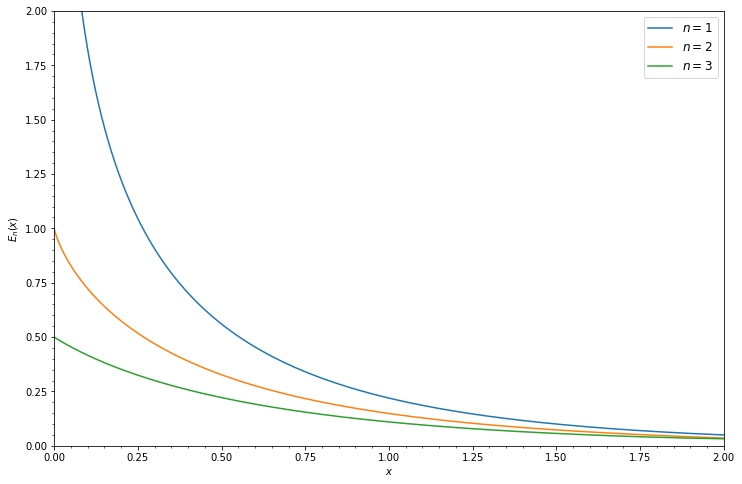

In [4]:
plt.figure(figsize=(12,8))
plt.plot(x,exp_integral(1,x), label=r'$n = 1$')
plt.plot(x,exp_integral(2,x), label=r'$n = 2$')
plt.plot(x,exp_integral(3,x), label=r'$n = 3$')
plt.xlabel(r'$x$')
plt.ylabel(r'$E_n(x)$')
plt.xlim(0., 2.)
plt.ylim(0., 2.)
plt.axes().xaxis.set_minor_locator(AutoMinorLocator())
plt.axes().yaxis.set_minor_locator(AutoMinorLocator())
plt.legend(fontsize=12.)

Catatan: Notifikasi di atas muncul karena pada perhitungan berusaha untuk membagi bilangan dengan nilai nol. Dapat diabaikan.